In [2]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir("/Users/akemberling/Documents/Repositories/aos_data_carpentry")

# Visualizing CMIP Data

As a first step towards making a visual comparison of the CSIRO-Mk3-6-0 and ACCESS1-3 historical precipitation climatology, we are going to create a quick plot of the ACCESS1-3 data.



In [3]:
access_pr_file = 'data/pr_Amon_ACCESS1-3_historical_r1i1p1_200101-200512.nc'

Since geographic data files can often be very large, when you first open a data file in xarray it simply loads the metadata associated with the file (this is known as “lazy loading”). You can then view summary information about the contents of the file before deciding whether you’d like to load some or all of the data into memory.

In [4]:
dset = xr.open_dataset(access_pr_file)
print(dset)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 145, lon: 192, time: 60)
Coordinates:
  * time       (time) datetime64[ns] 2001-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float32 ...
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
Attributes:
    CDI:                    Climate Data Interface version 1.7.1 (http://mpim...
    CDO:                    Climate Data Operators version 1.7.1 (http://mpim...
    NCO:                    4.7.0
    associated_files:       baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLoc...
    branch_time:            90945.0
    cmor_version:           2.8.0
    comment:                at surface; includes both liquid and solid phases...
    contact: 

We can see that our dset object is an xarray.Dataset, which when printed shows all the metadata associated with our netCDF data file.

In this case, we are interested in the precipitation variable contained within that xarray Dataset:

In [5]:
print(dset['pr'])

<xarray.DataArray 'pr' (time: 60, lat: 145, lon: 192)>
[1670400 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2001-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    cell_methods:   time: mean


We can actually use either the dset['pr'] or dset.pr syntax to access the precipitation xarray.DataArray.

To calculate the precipitation climatology, we can make use of the fact that xarray DataArrays have built in functionality for averaging over their dimensions.

In [6]:
clim = dset['pr'].mean('time', keep_attrs=True)
print(clim)

<xarray.DataArray 'pr' (lat: 145, lon: 192)>
array([[2.542048e-06, 2.542048e-06, 2.542048e-06, ..., 2.541606e-06,
        2.541606e-06, 2.541606e-06],
       [2.511442e-06, 2.492513e-06, 2.472960e-06, ..., 2.570118e-06,
        2.550404e-06, 2.531296e-06],
       [2.396512e-06, 2.365124e-06, 2.330266e-06, ..., 2.472362e-06,
        2.455286e-06, 2.427222e-06],
       ...,
       [8.877672e-06, 8.903967e-06, 8.938327e-06, ..., 8.819357e-06,
        8.859161e-06, 8.873179e-06],
       [8.748589e-06, 8.739819e-06, 8.723918e-06, ..., 8.797057e-06,
        8.776324e-06, 8.789103e-06],
       [7.988647e-06, 7.988647e-06, 7.988647e-06, ..., 7.988647e-06,
        7.988647e-06, 7.988647e-06]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
   

Now that we’ve calculated the climatology, we want to convert the units from kg m-2 s-1 to something that we are a little more familiar with like mm day-1.

To do this, consider that 1 kg of rain water spread over 1 m2 of surface is 1 mm in thickness and that there are 86400 seconds in one day. Therefore, 1 kg m-2 s-1 = 86400 mm day-1.

The data associated with our xarray DataArray is simply a numpy array,

In [7]:
type(clim.data)

numpy.ndarray

so we can go ahead and multiply that array by 86400 and update the units attribute accordingly:

In [8]:
clim.data = clim.data * 86400
clim.attrs['units'] = 'mm/day' 

print(clim)

<xarray.DataArray 'pr' (lat: 145, lon: 192)>
array([[0.219633, 0.219633, 0.219633, ..., 0.219595, 0.219595, 0.219595],
       [0.216989, 0.215353, 0.213664, ..., 0.222058, 0.220355, 0.218704],
       [0.207059, 0.204347, 0.201335, ..., 0.213612, 0.212137, 0.209712],
       ...,
       [0.767031, 0.769303, 0.772271, ..., 0.761992, 0.765432, 0.766643],
       [0.755878, 0.75512 , 0.753746, ..., 0.760066, 0.758274, 0.759379],
       [0.690219, 0.690219, 0.690219, ..., 0.690219, 0.690219, 0.690219]])
Coordinates:
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          mm/day
    cell_methods:   time: mean


We could now go ahead and plot our climatology using matplotlib, but it would take many lines of code to extract all the latitude and longitude information and to setup all the plot characteristics. Recognising this burden, the xarray developers have built on top of matplotlib.pyplot to make the visualisation of xarray DataArrays much easier.

IPython (and hence the Jupyter notebook) come with a whole bunch of built in magic commands. Use the built in %matplotlib inline magic command to make plots appear in the notebook rather than in a separate window.

In [9]:
%matplotlib inline

/Users/akemberling/opt/anaconda2/envs/pysci/lib/python3.5/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


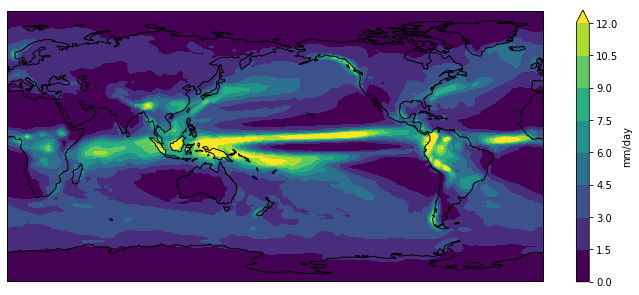

In [10]:
fig = plt.figure(figsize=[12,5])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

clim.plot.contourf(ax=ax,
                   levels=np.arange(0, 13.5, 1.5),
                   extend='max',
                   transform=ccrs.PlateCarree(),
                   cbar_kwargs={'label': clim.units})
ax.coastlines()

plt.show()

The default colorbar used by matplotlib is viridis. It used to be jet, but that was changed a couple of years ago in response to the #endtherainbow campaign.

Putting all the code together (and reversing viridis so that wet is purple and dry is yellow)…

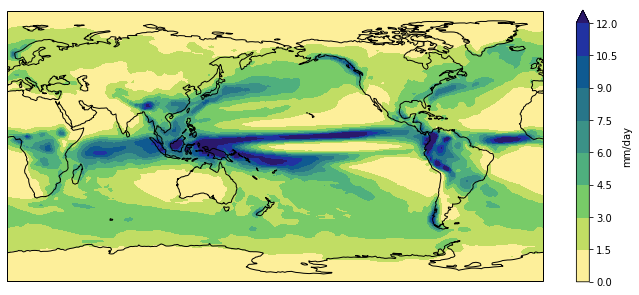

In [12]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cmocean

access_pr_file = 'data/pr_Amon_ACCESS1-3_historical_r1i1p1_200101-200512.nc'

dset = xr.open_dataset(access_pr_file)

clim = dset['pr'].mean('time', keep_attrs=True)

clim.data = clim.data * 86400
clim.attrs['units'] = 'mm/day'

fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
clim.plot.contourf(ax=ax,
                   levels=np.arange(0, 13.5, 1.5),
                   extend='max',
                   transform=ccrs.PlateCarree(),
                   cbar_kwargs={'label': clim.units},
                   cmap=cmocean.cm.haline_r)
ax.coastlines()
plt.show()

Rather than plot the annual climatology, edit the code so that it plots the June-August (JJA) season.

(Hint: the groupby functionality can be used to group all the data into seasons prior to averaging over the time axis)

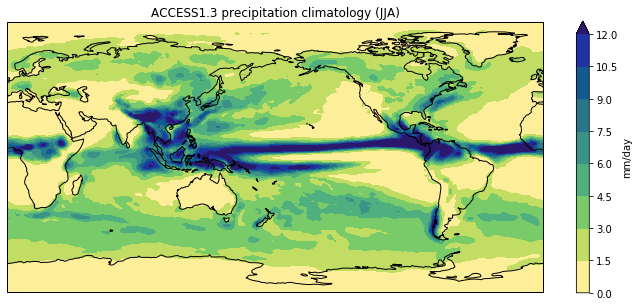

In [20]:
clim = dset['pr'].groupby('time.season').mean('time', keep_attrs=True) 

clim.data = clim.data * 86400
clim.attrs['units'] = 'mm/day'



fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
clim.sel(season='JJA').plot.contourf(ax=ax,
                                     levels=np.arange(0, 13.5, 1.5),
                                     extend='max',
                                     transform=ccrs.PlateCarree(),
                                     cbar_kwargs={'label': clim.units},
                                     cmap=cmocean.cm.haline_r)
                                     
ax.coastlines()
title = '%s precipitation climatology (JJA)' %(dset.attrs['model_id'])
#Plot title
plt.title(title)
plt.show()
